In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx # networkx是一个常用的绘制复杂图形的Python包。

import pgl

In [3]:
def build_graph():
    # 定义节点的个数；每个节点用一个数字表示，即从0~9
    num_node = 10
    # 添加节点之间的边，每条边用一个tuple表示为: (src, dst)
    edge_list = [(2, 0), (2, 1), (3, 1),(4, 0), (0, 5), 
             (6, 0), (6, 4), (5, 6), (7, 0), (1, 7),
             (2, 7), (7, 3), (8, 0), (9, 7)]

    g = pgl.graph.Graph(num_nodes = num_node, edges = edge_list)

    return g

# 创建一个图对象，用于保存图网络的各种数据。
g = build_graph()

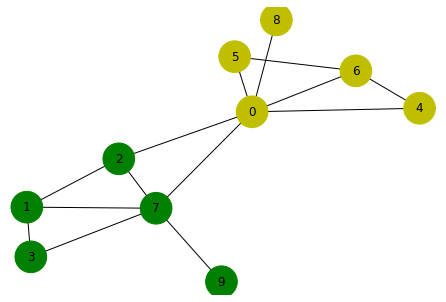

In [4]:
def display_graph(g):
    nx_G = nx.Graph()
    nx_G.add_nodes_from(range(g.num_nodes))
    nx_G.add_edges_from(g.edges)
    
    pos = nx.spring_layout(nx_G, iterations=50)
    
    nx.draw(nx_G, 
            pos,
            with_labels=True,
            node_color=['y','g','g','g','y','y','y','g','y','g'], 
            node_size=1000)

    plt.show()

display_graph(g)

In [9]:
def deepwalk(graph, start_node, walk_len):
    walk = [start_node] # 初始化游走序列

    for d in range(walk_len): # 最大长度范围内进行采样
        current_node = walk[-1] 
        successors = graph.successor(np.array([current_node])) # graph.successor: 获取当前节点的后继邻居
        print("当前节点: %d" % current_node)
        print("后继邻居", successors[0])
        succ = successors[0]
        if len(succ) == 0:
            break
        next_node = np.random.choice(succ, 1)
        walk.extend(next_node)
        
    return walk

In [10]:
walk = deepwalk(g, 2, 4)
print(walk)

当前节点: 2
后继邻居 [0 1 7]
当前节点: 7
后继邻居 [0 3]
当前节点: 0
后继邻居 [5]
当前节点: 5
后继邻居 [6]
[2, 7, 0, 5, 6]
